In [17]:
from project3 import Box, Sphere, generate_random_point_in_box, plot_points,is_point_inside_sphere, generate_spheres_in_box, calculate_and_plot_fraction_sphere, pi_calculation, plot_fraction_spheres, plot_fraction_dna, generate_random_walkers, generate_random_walkers_fast, plot_random_walkers, test_strategy_one_sphere_random_walkers, accessible_dna_volume_from_walkers
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# TOPIC 1

## Task 0

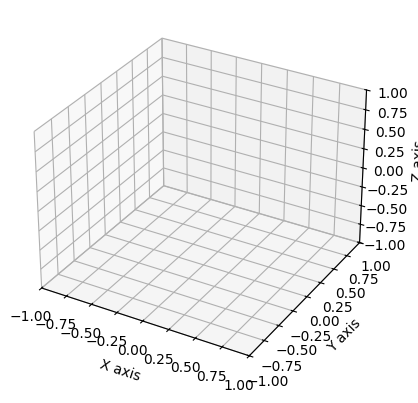

In [18]:
box = Box(-1, 1, -1, 1, -1, 1)

# plot the box
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([box.min_x, box.max_x])
ax.set_ylim([box.min_y, box.max_y])
ax.set_zlim([box.min_z, box.max_z])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Task 1

[ 0.00635065 -0.92100129 -0.42478333]


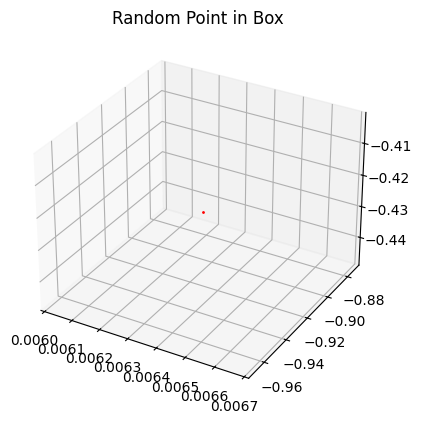

In [19]:
random_point = generate_random_point_in_box(box)
print(random_point)

plot_points([random_point], "Random Point in Box")

## Task 2

In [20]:

# In our simulation box of 1x1x1, we define a sphere of radius 1 centered at the origin
sphere = Sphere(0, 0, 0, 1)


## Task 3

In [21]:
point = (0.5, 0.5, 0.5)
is_inside = is_point_inside_sphere(point, sphere)
print(f"Is the point {point} inside the sphere?= {is_inside}")

Is the point (0.5, 0.5, 0.5) inside the sphere?= True


## Task 4

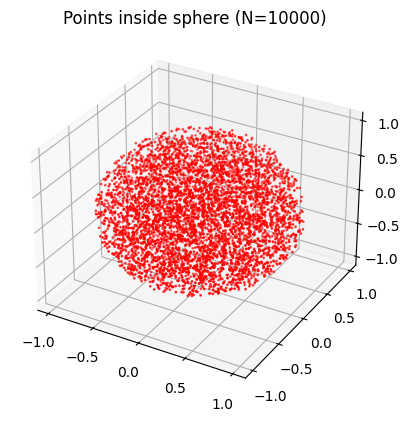

Theoretical volume of the sphere: 4.1887902047863905
Estimated accessible volume around the sphere: 4.1992


In [22]:
N=10000

fraction_inside = calculate_and_plot_fraction_sphere(sphere, box, N)

 # Theoretical volume of the sphere
theoretical_volume = (4/3) * math.pi * sphere.radius**3
print(f"Theoretical volume of the sphere: {theoretical_volume}")
estimated_accessible_volume = fraction_inside * ((box.max_x - box.min_x) * (box.max_y - box.min_y) * (box.max_z - box.min_z))
print(f"Estimated accessible volume around the sphere: {estimated_accessible_volume}")


We see that the estimated accessible volume is very close to the theoretical value.

## Task 5

In [23]:
# we know estimate pi using the relation volume_sphere = (4/3)*pi*r^3
estimated_pi = pi_calculation(1000)
print(f"Estimated value of pi: {estimated_pi}")

Estimated value of pi: 3.116


## Task 6

In [24]:
# generate 10 random sphere inside our a box and plot them
spheres = generate_spheres_in_box(10, box)


## Task 7

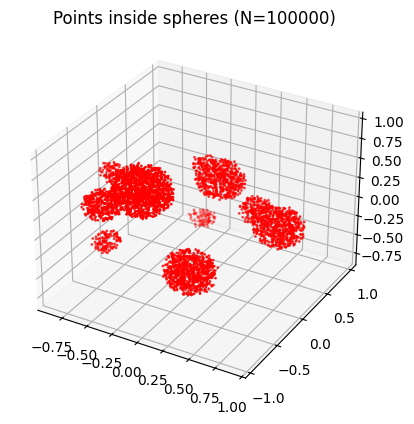

fraction_inside: 0.04121, estimated_volume: 0.32968, exact_volume: 0.3345801509715658


In [25]:
fraction_inside, estimated_volume, exact_volume = plot_fraction_spheres(spheres, box, 100000)
print(f"fraction_inside: {fraction_inside}, estimated_volume: {estimated_volume}, exact_volume: {exact_volume}")

## Task 8


DNA molecule consisting of Hydrogen, Carbon, Nitrogen, Oxygen, and Phosphorus atoms
In the provided file we have to read the atomic coordinates of these atoms

From the periodic table we know that:
    hydrogen radius = 120 picometer
    carbon radius = 170 picometer
    nitrogen radius = 155 picometer
    oxygen radius = 152 picometer
    phosphorus radius = 180 picometer

Since the cordinates are given in Angstroms, we convert the radii from picometers to Angstroms
we divide by 100 since 1 Angstrom = 100 picometers

In [26]:

atom_radii = {
    'H': 1.20,
    'C': 1.70,
    'N': 1.55,
    'O': 1.52,
    'P': 1.80
}

dna_spheres = []

# reading our file
with open('dna_coords.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if len(parts) == 4:
            elem = parts[0]
            x, y, z = map(float, parts[1:])
            dna_spheres.append((x, y, z, atom_radii.get(elem, 1.5)))

## Task 9

In [27]:
# based on manual inspection of our coordinare file we set the box dimensions that fit all atoms
box = Box(-50, -25, -20, 20, -10, 10)

## Task 10

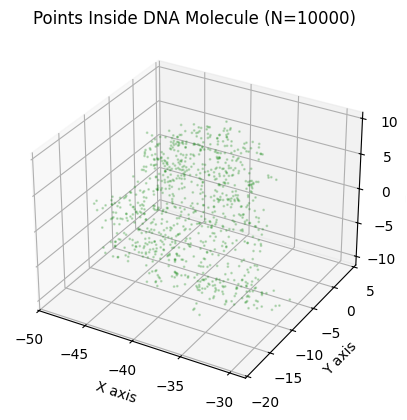

fraction_inside: 0.0884, estimated_volume: 1768.0000000000002, exact_volume: 3672.276872539243


In [28]:
fraction_inside, estimated_volume, exact_volume = plot_fraction_dna(dna_spheres, box, 10000)
print(f"fraction_inside: {fraction_inside}, estimated_volume: {estimated_volume}, exact_volume: {exact_volume}")

We see that the estimated value is less accurate than the previous simulations due to the complex shape of the DNA molecule. because we ignore overlapping volumes of the atoms.

# TOPIC 2

## Task 1

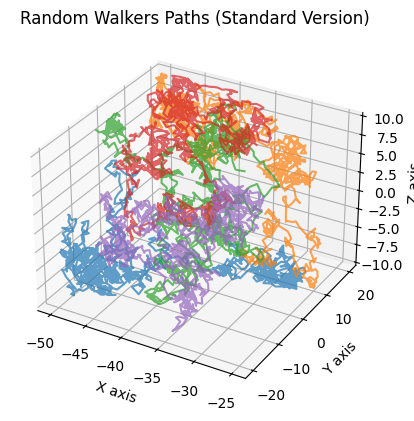

In [29]:
num_walkers = 5
walkers = generate_random_walkers(num_walkers, box, n_steps=1000, step_size=1.0)

# plotting the walkers
plot_random_walkers(walkers, title="Random Walkers Paths (Standard Version)")

## Task 2

Instead of using loops, we use vectors

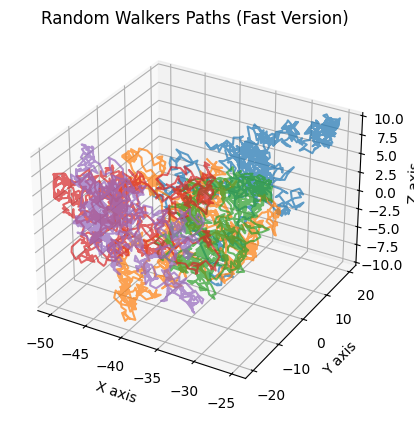

In [30]:
walkers_fast = generate_random_walkers_fast(num_walkers, box, n_steps=1000, step_size=1.0)
# plotting the walkers
plot_random_walkers(walkers_fast, title="Random Walkers Paths (Fast Version)")

## Task 3
To calculate the accessible volume of the DNA molecule, we used the random walker method. This Monte Carlo–based approach estimates accessible regions by simulating random movements in a 3D box and checking whether positions fall outside atomic spheres. A similar random walk concept has been discussed by Novikov et al. (2020) in their study on Brownian diffusion on a sphere [Novikov et al., 2020](https://doi.org/10.1016/j.amc.2019.124670).



## Task 4
To verify the accuracy of our strategy, we, instead of the DNA molecule, we replace it with a single sphere of known volume. We then apply the same random walker method to estimate the accessible volume around this sphere. By comparing the estimated accessible volume with the theoretical value, we can assess the accuracy of our method.

In [31]:

# we test a known sphere
num_walkers = 100
box = Box(-2, 2, -2, 2, -2, 2)
sphere = Sphere(0, 0, 0, 1)

_, acc_vol_est, sph_vol_est, sph_vol_exact = test_strategy_one_sphere_random_walkers(
    box, sphere, n_walkers=num_walkers, n_steps=1000, step_size=0.1
)

# exact accessible volume is the volume of the box minus the volume of the sphere
exact_accessible_volume = (box.max_x - box.min_x) * (box.max_y - box.min_y) * (box.max_z - box.min_z) - sph_vol_exact
print(f"Exact accessible volume:      {exact_accessible_volume:.6f} Å³")
print(f"Accessible volume (estimate): {acc_vol_est:.6f} Å³")

Exact accessible volume:      59.811210 Å³
Accessible volume (estimate): 58.922837 Å³


We see that our estimated accessible volume is very close to the theoretical value, indicating that our random walker method is accurate for calculating accessible volumes around spherical objects. Below is the version for calculating the dna accessible volume.

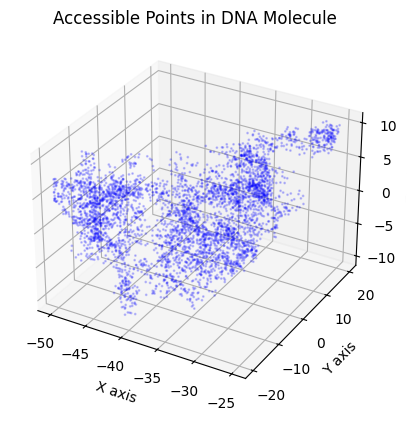

Accessible fraction: 84.7553


In [32]:
# our updated box 
box = Box(
    min_x=-60,  
    max_x=-21, 
    min_y=-25, 
    max_y=30, 
    min_z=-20, 
    max_z=20  
)

accessible_fraction, accessible_volume, exact_volume, estimated_accessible_volume = accessible_dna_volume_from_walkers(walkers_fast, dna_spheres, box)

print(f"Accessible fraction: {math.ceil(accessible_fraction*10000)/10000}")



### Use of AI
Mascuud: I used AI to help find ways of estimating the accessible volume of the DNA molecule.

### How we worked
Abdi: I worked mostly on topic 1
Mascuud: I worked on topic 2, and also refactoring the code onto a file of functions.


## References
Novikov, A., Kuzmin, D., & Ahmadi, O. (2020). *Random walk methods for Monte Carlo simulations of Brownian diffusion on a sphere*. Applied Mathematics and Computation, 364, 124670. https://doi.org/10.1016/j.amc.2019.124670
